<h1><center>Arunaggiri Pandian Karunanidhi</center></h1>

#### A. Load the /public/bmort/python/beans.csv data set into a data frame. Are there any missing values? Perform any necessary data imputation on the data set. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv('beans.csv')
df.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER


In [4]:
print(df.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       1
ShapeFactor4       0
Class              0
dtype: int64


There is one null value in 
Column ShapeFactor3<br>

In [5]:
# replacing it with median value

# mode value is
print(df['ShapeFactor3'].median())

# add .mode()[0] as mode returns a series
df['ShapeFactor3'] = df["ShapeFactor3"].fillna(df['ShapeFactor3'].median())

print(len(df[df['ShapeFactor3'].isna()]['ShapeFactor3']))

0.6424101875
0


In [6]:
print(df.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


#### B. Produce a table of summary statistics on the data set. How do the ranges of the values in the columns compare? Does each column of data have similar magnitudes and ranges? Are there any outliers?

In [7]:
# summary statistic

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13533.0,53057.388384,29401.235132,20420.000000,36269.000000,44581.000000,61422.000000,254616.000000
Perimeter,13533.0,855.066479,214.781993,524.736000,703.180000,793.897000,977.266000,1985.370000
MajorAxisLength,13533.0,319.922981,85.833897,183.601165,253.059398,296.441382,376.352986,738.860154
MinorAxisLength,13533.0,202.378468,45.064896,122.512653,175.884179,192.500481,217.263451,460.198497
AspectRatio,13533.0,1.581111,0.245328,1.024868,1.430641,1.549898,1.704026,2.430306
Eccentricity,13533.0,0.750310,0.091890,0.218951,0.715134,0.764011,0.809699,0.911423
ConvexArea,13533.0,53777.120890,29853.152141,20684.000000,36669.000000,45123.000000,62388.000000,263261.000000
EquivDiameter,13533.0,253.052530,59.324886,161.243764,214.893288,238.248383,279.651425,569.374358
Extent,13533.0,0.749827,0.048939,0.555315,0.718753,0.759903,0.786847,0.866195
Solidity,13533.0,0.987150,0.004651,0.919246,0.985675,0.988287,0.990018,0.994677


In [8]:
# Outlier Calculation

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

In [12]:
print('Number of Outliers in Each Column')

import warnings
warnings.filterwarnings("ignore")

((df < q1 - 1.5*iqr) | (df > q3 + 1.5*iqr)).sum()

Number of Outliers in Each Column


Area               550
AspectRatio        484
Class                0
Compactness        121
ConvexArea         549
Eccentricity       832
EquivDiameter      526
Extent             271
MajorAxisLength    379
MinorAxisLength    567
Perimeter          500
ShapeFactor1       532
ShapeFactor2         0
ShapeFactor3       200
ShapeFactor4       760
Solidity           771
roundness           98
dtype: int64

In [13]:
# replacing outliers with null values

# mask = (df < q1 - 1.5*iqr) | (df > q3 + 1.5*iqr)
# df[mask] = np.nan

In [14]:
# ((df < q1 - 1.5*iqr) | (df > q3 + 1.5*iqr)).sum()

                         Boxplot of Class vs Area


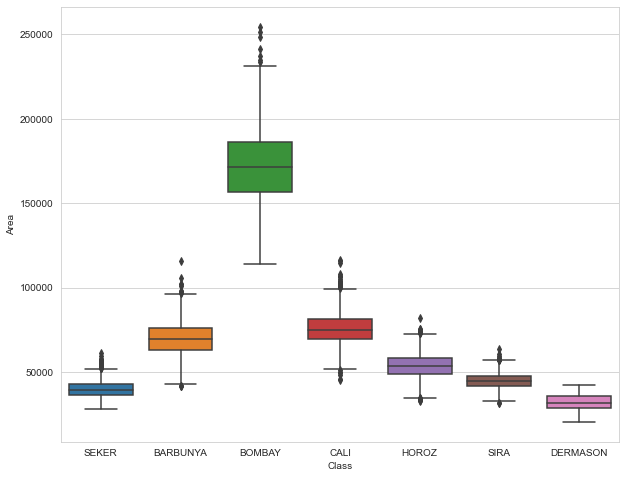

                         Boxplot of Class vs Perimeter


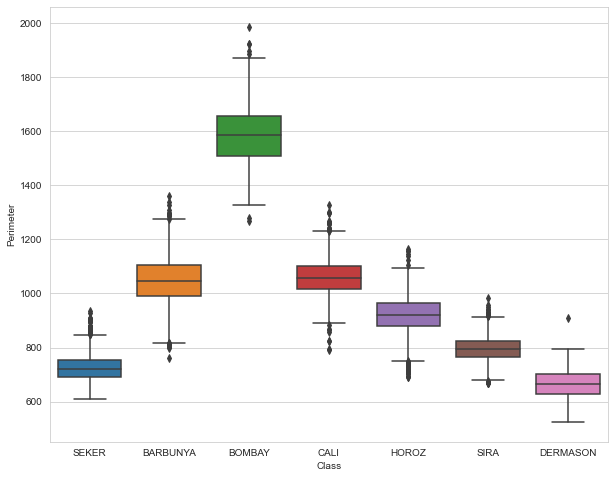

                         Boxplot of Class vs MajorAxisLength


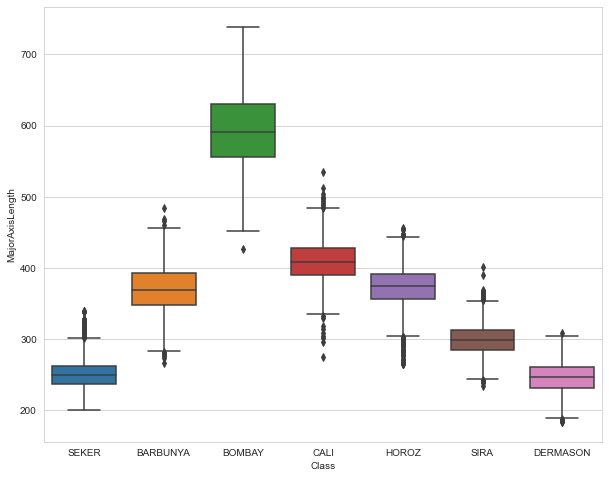

                         Boxplot of Class vs MinorAxisLength


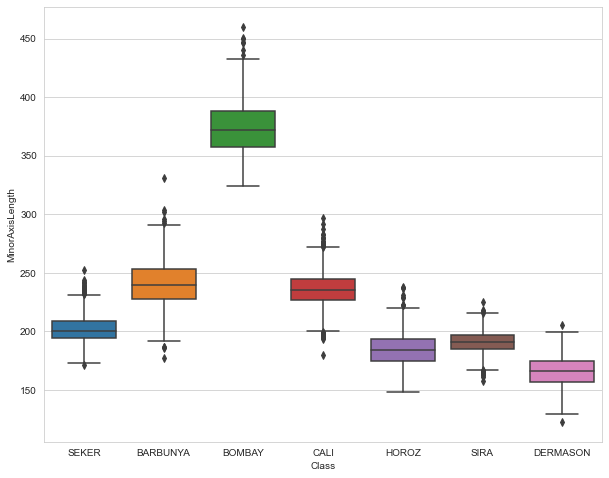

                         Boxplot of Class vs AspectRatio


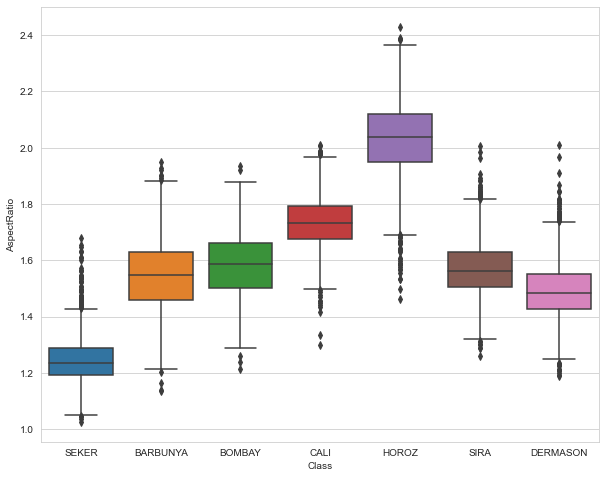

                         Boxplot of Class vs Eccentricity


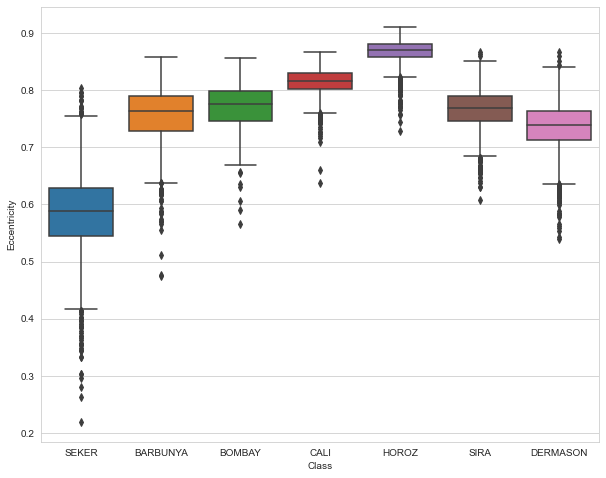

                         Boxplot of Class vs ConvexArea


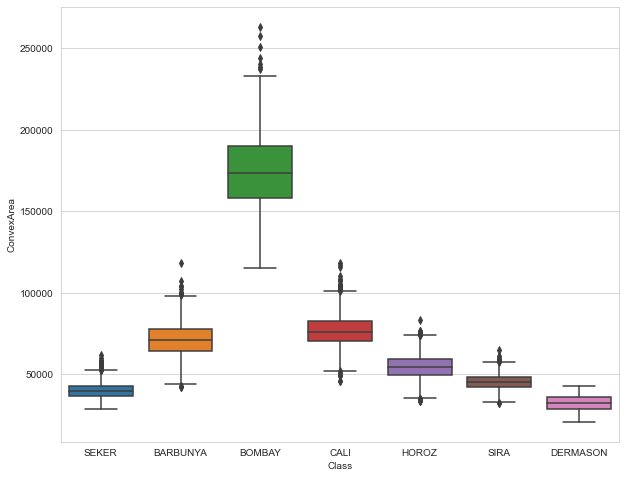

                         Boxplot of Class vs EquivDiameter


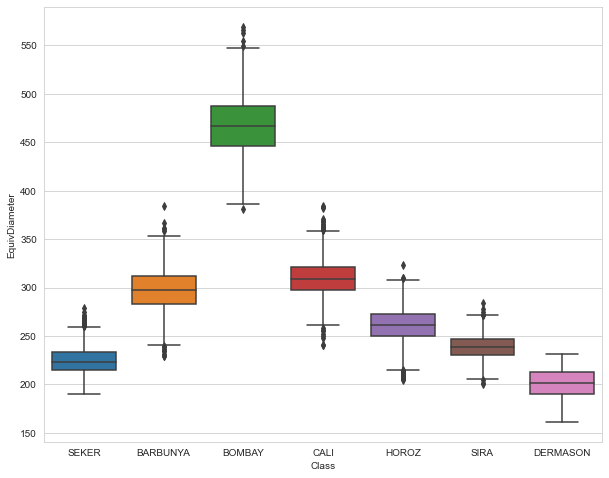

                         Boxplot of Class vs Extent


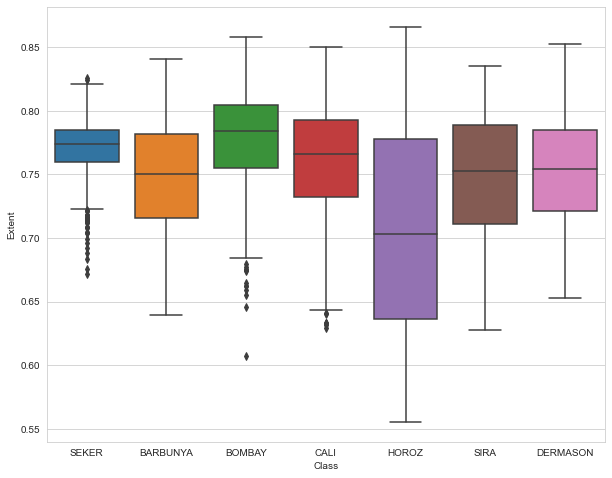

                         Boxplot of Class vs Solidity


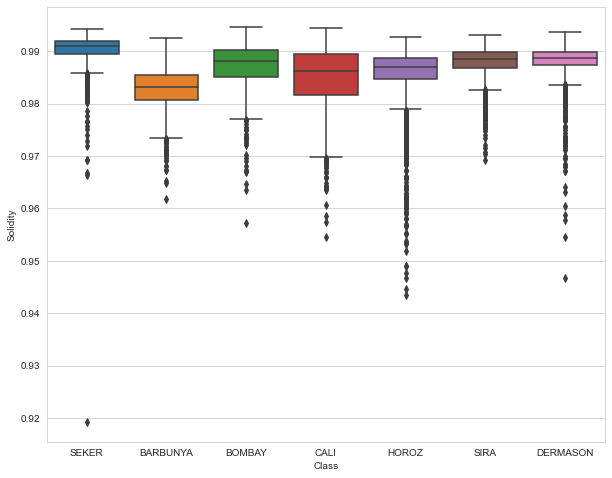

                         Boxplot of Class vs roundness


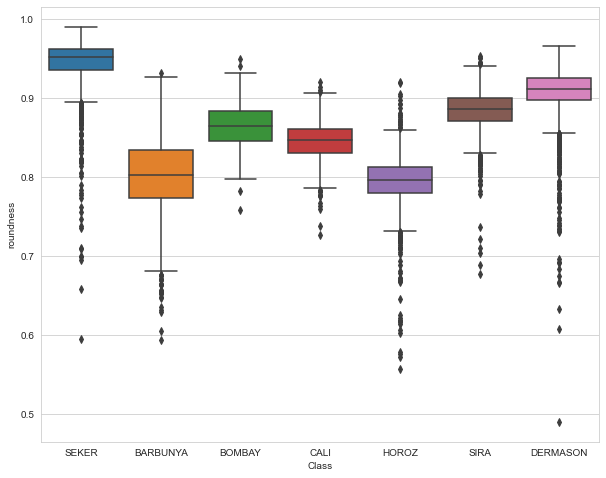

                         Boxplot of Class vs Compactness


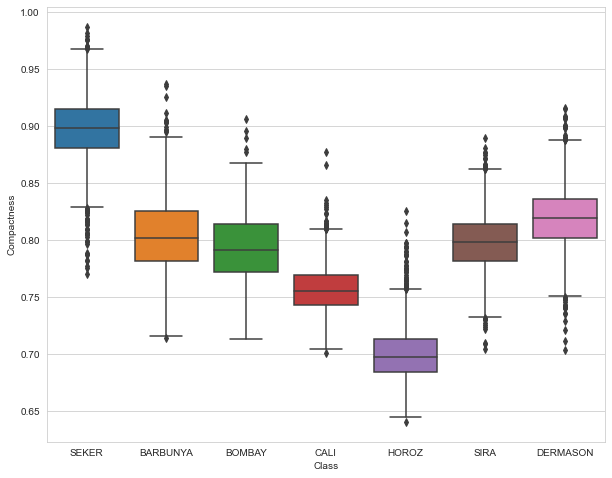

                         Boxplot of Class vs ShapeFactor1


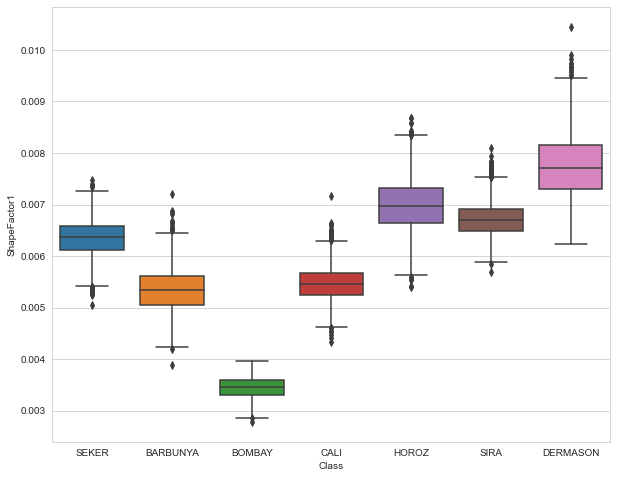

                         Boxplot of Class vs ShapeFactor2


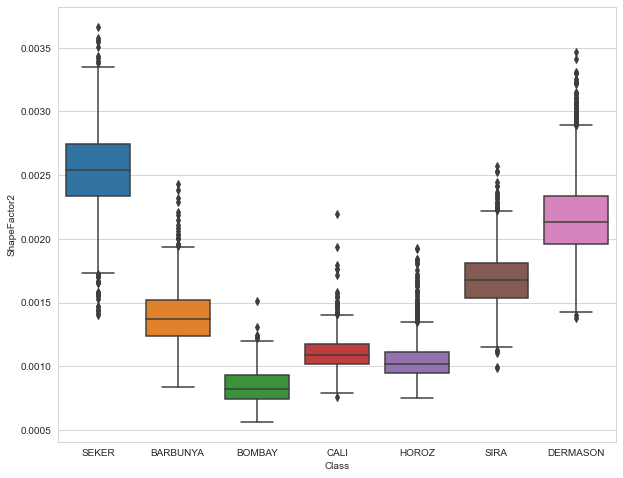

                         Boxplot of Class vs ShapeFactor3


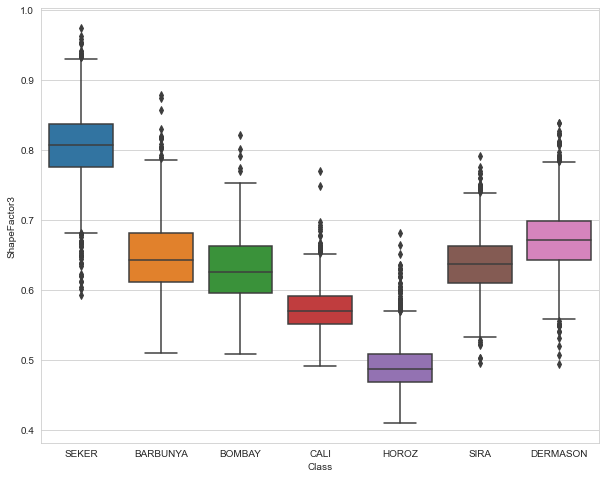

                         Boxplot of Class vs ShapeFactor4


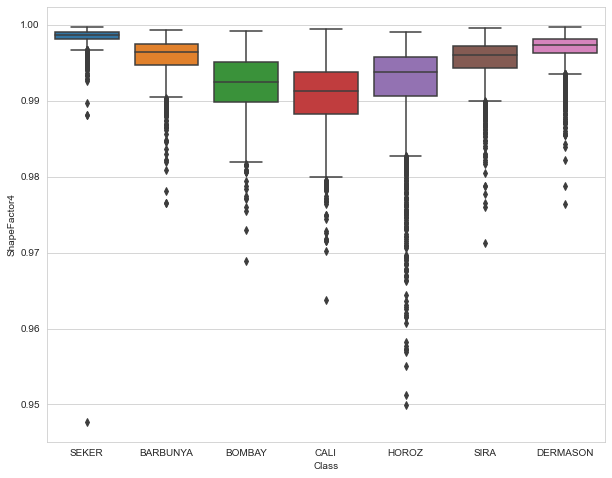

In [17]:
# using visualization to check outliers

def check_outliers(df):
    sns.set_style("whitegrid")
    for col in df.columns:
        if col != 'Class':
            fig = plt.figure(figsize=(10,8))
            sns.boxplot(x = 'Class', y = col , data = df)
            print('                         Boxplot of Class vs', col)
            plt.show()

check_outliers(df)

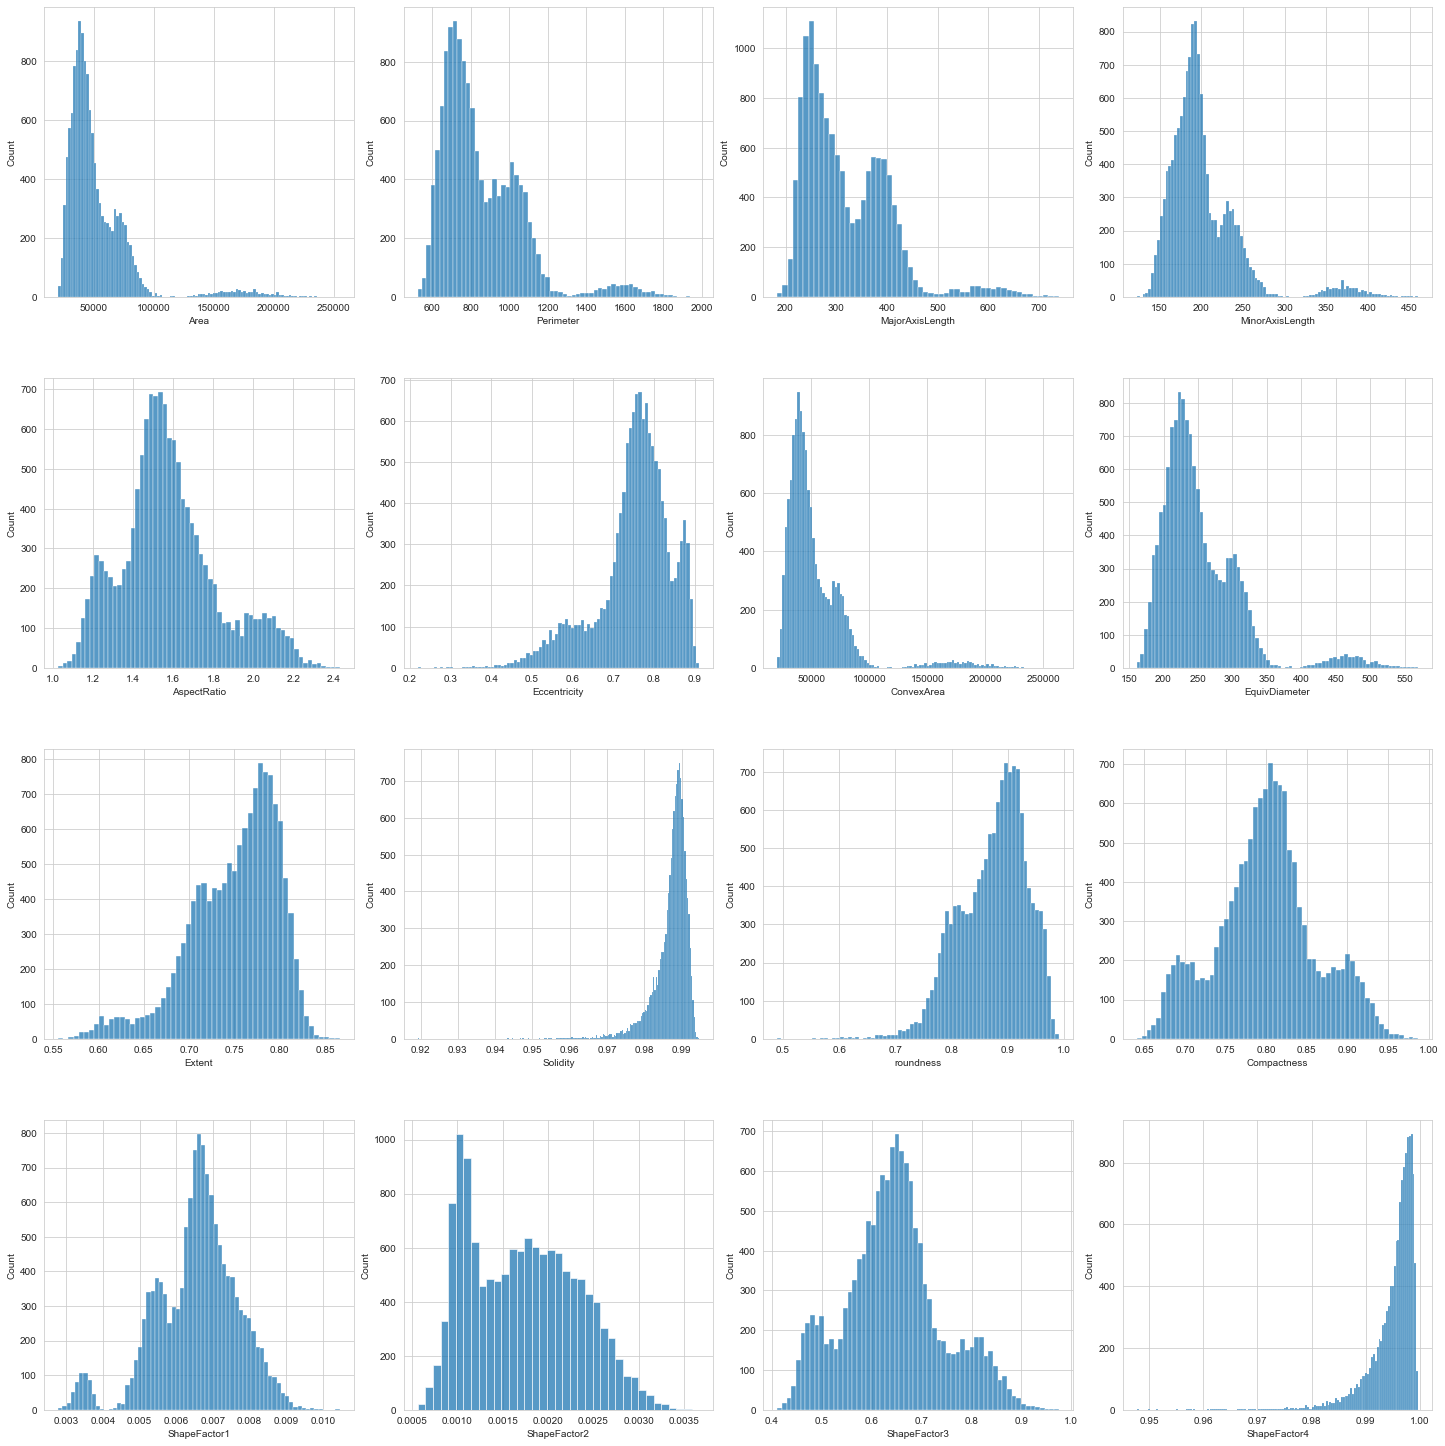

In [18]:
# Plot features value distribution
fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
index = 0

features = df.drop(["Class"], axis = 1)

axs = axs.flatten()
for k, v in features.items():
    sns.histplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

Observations:<br>

1. The data has different scaling (magnitude) for some features.<br>
2. The data has some features that are skewed.

#### C) Using the Seaborn library’s heatmap() function, generate a plot showing the correlations between the numerical data in the data set. Show the commands used to generate the plot and include the plot in your output.

[Text(0.5, 1.0, 'Correlation Heatmap')]

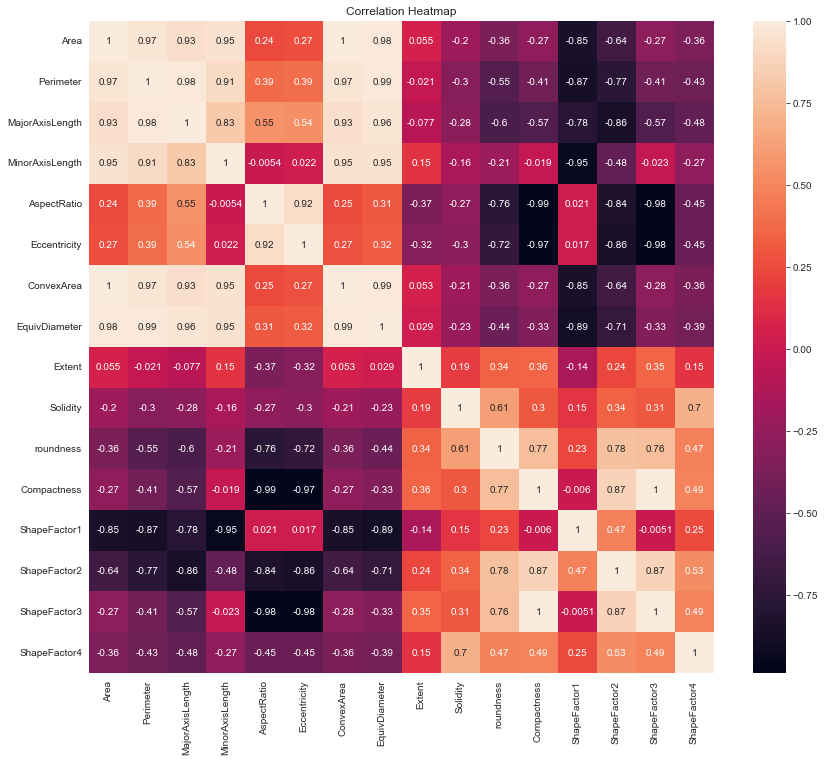

In [19]:
fig=plt.figure(figsize=(14,12))
#print("Correlation Heatmap")
sns.heatmap(df.corr(), annot=True).set(title='Correlation Heatmap')

#### D) Based on the correlation plot, decide which features to include for machine learning. Decide if any of these features need to be standardized or scaled appropriately

In [20]:
# scaling features

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer


columns_need_to_be_scaled = df.drop(columns=['Class']).columns

SS = StandardScaler().fit(df[columns_need_to_be_scaled])

df[columns_need_to_be_scaled] = pd.DataFrame(SS.transform(df[columns_need_to_be_scaled]), 
                                                   columns=columns_need_to_be_scaled)

df.head(3)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.838853,-1.139688,-1.301921,-0.632217,-1.564982,-2.182023,-0.839544,-1.060495,0.288035,0.366749,1.420254,1.838075,0.681965,2.397588,1.924193,0.838758,SEKER
1,-0.827322,-1.010590,-1.391089,-0.435922,-1.971943,-3.684171,-0.824236,-1.041419,0.697652,-0.465418,0.225234,2.496844,0.369690,3.096544,2.690565,0.771240,SEKER
2,-0.805349,-1.075346,-1.247768,-0.586894,-1.513942,-2.041468,-0.806883,-1.005376,0.578012,0.517851,1.248936,1.763526,0.604443,2.230451,1.839561,0.917476,SEKER


In [21]:
# Features dropped and not chosen for training the model

X = df[columns_need_to_be_scaled].drop(columns=['ConvexArea', 'Eccentricity', 'Compactness',
                                                      'Area', 'Perimeter', 'EquivDiameter', 
                                                      'MinorAxisLength', 'ShapeFactor2'])
y = df['Class']

In [22]:
def plot_heat_map(df):
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

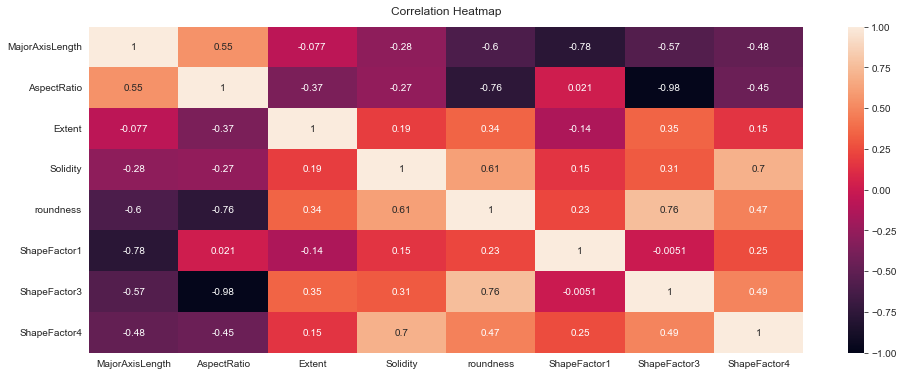

In [23]:
plot_heat_map(X)

#### E. Partition the beans data set so that a random sample of 80% of the data will be used for training and 20% will be used for testing your machine learning model. 

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = 0.2,
                                                  random_state = 42)

#### F. Generate a Random Forest machine learning model for classifying the 7 types of beans based on the chosen features from the data set. Use 50 trees to build the model

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, 
                            min_samples_leaf=10, 
                            max_features=0.15, 
                            n_estimators=50)
rf.fit(X, y)
# print('Full_columns_accuracy_train: %f'%(rf.score(X_train, y_train)))
# print('Full_columns_accuracy_val: %f'%(rf.score(X_test, y_test)))
# print('===========================')

RandomForestClassifier(max_features=0.15, min_samples_leaf=10, n_estimators=50,
                       random_state=42)

In [30]:
from sklearn import metrics

y_pred = rf.predict(X_test)

print("Accuracy of the Model: %.2f" % ((metrics.accuracy_score(y_test, y_pred)*100)), '%')

Accuracy of the Model: 94.16 %


#### G. Use the test data set (i.e. the 20% of the data that was kept aside earlier) to generate a final validation for your model. Generate a multi-class confusion matrix for the test data to demonstrate the accuracy of the model. Comment on the accuracy of the model.

In [177]:
from sklearn.metrics import classification_report

predictions = rf.predict(X_test)
performance_metrics = pd.DataFrame(classification_report(y_test, predictions, output_dict=True))
performance_metrics

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA,accuracy,macro avg,weighted avg
precision,0.968254,1.000000,0.951368,0.926087,0.963542,0.972840,0.891791,0.941633,0.953412,0.942080
recall,0.931298,0.991071,0.957187,0.939706,0.961039,0.951691,0.907021,0.941633,0.948430,0.941633
f1-score,0.949416,0.995516,0.954268,0.932847,0.962289,0.962149,0.899341,0.941633,0.950832,0.941777
support,262.000000,112.000000,327.000000,680.000000,385.000000,414.000000,527.000000,0.941633,2707.000000,2707.000000


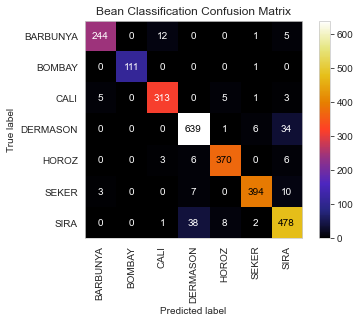

In [178]:
# Displaying Results in Confusion Matrix

from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(rf, X_test, y_test, colorbar=True, cmap='CMRmap')  
 
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Bean Classification Confusion Matrix')
plt.show()  

## Accuracy of the Model: 94.16 %

#### H. Based on your model, classify the beans provided in the unlabeled /public/bmort/python/beans-unknown.csv data set. Indicate which classification of the 7 available types has been assigned to each of the 5 unlabeled beans.

In [179]:
test = pd.read_csv('beans-unknown.csv')
test.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,37500,728.191,275.840463,173.818266,1.586948,0.776481,37944,218.509686,0.703406,0.988299,0.888690,0.792160,0.007356,0.001787,0.627517,0.995836
1,37500,715.578,272.171813,175.668301,1.549351,0.763818,37797,218.509686,0.786229,0.992142,0.920295,0.802837,0.007258,0.001860,0.644548,0.998631
2,37511,718.350,267.039757,179.141937,1.490660,0.741599,37868,218.541732,0.717365,0.990573,0.913474,0.818387,0.007119,0.001970,0.669756,0.998379


In [180]:
test.shape

(5, 16)

In [181]:
columns_need_to_be_scaled = test.columns

SS = StandardScaler().fit(test[columns_need_to_be_scaled])

test[columns_need_to_be_scaled] = pd.DataFrame(SS.transform(test[columns_need_to_be_scaled]), 
                                                   columns=columns_need_to_be_scaled)

test.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-1.210167,1.400528,1.669933,-1.592466,1.643560,1.603313,0.655770,-1.210169,-1.393678,-0.808631,-1.409751,-1.658083,1.668114,-1.647227,-1.652531,-1.863595
1,-1.210167,-1.279132,0.428741,-0.574199,0.490283,0.527208,-1.639425,-1.210169,0.793939,1.585230,1.272624,-0.446369,0.441809,-0.455052,-0.451837,0.940218
2,0.541390,-0.690215,-1.307557,1.337707,-1.310044,-1.360985,-0.530861,0.541415,-1.024995,0.607604,0.693712,1.318173,-1.299832,1.333936,1.325410,0.688126


In [182]:
X = test[columns_need_to_be_scaled].drop(columns=['ConvexArea', 'Eccentricity', 'Compactness',
                                                      'Area', 'Perimeter', 'EquivDiameter', 
                                                      'MinorAxisLength', 'ShapeFactor2'])

In [183]:
predictions = rf.predict(X)

In [184]:
predictions

array(['HOROZ', 'SIRA', 'SEKER', 'SIRA', 'SIRA'], dtype=object)

In [185]:
Class = list(predictions)
Class

['HOROZ', 'SIRA', 'SEKER', 'SIRA', 'SIRA']

In [186]:
test = pd.read_csv('beans-unknown.csv')
test['Class'] = Class
test

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,37500,728.191,275.840463,173.818266,1.586948,0.776481,37944,218.509686,0.703406,0.988299,0.888690,0.792160,0.007356,0.001787,0.627517,0.995836,HOROZ
1,37500,715.578,272.171813,175.668301,1.549351,0.763818,37797,218.509686,0.786229,0.992142,0.920295,0.802837,0.007258,0.001860,0.644548,0.998631,SIRA
2,37511,718.350,267.039757,179.141937,1.490660,0.741599,37868,218.541732,0.717365,0.990573,0.913474,0.818387,0.007119,0.001970,0.669756,0.998379,SEKER
3,37513,720.028,269.589608,177.510928,1.518721,0.752626,37981,218.547558,0.780545,0.987678,0.909270,0.810668,0.007187,0.001915,0.657182,0.998076,SIRA
4,37514,725.847,269.881174,177.418223,1.521158,0.753547,37920,218.550471,0.793309,0.989293,0.894773,0.809803,0.007194,0.001908,0.655780,0.997545,SIRA
